In [1]:
import os
import math
import matplotlib.pyplot as plt


def compute_errors_and_log(ground_truth_path, predicted_path):
    total_squared_error = 0
    total_absolute_error = 0
    total_relative_difference = 0  # For MRD
    num_files = 0
    num_gt_tptal_objects = 0
    gt_objects_per_file = [] 


    for filename in os.listdir(ground_truth_path):
        ground_truth_file = os.path.join(ground_truth_path, filename)
        predicted_file = os.path.join(predicted_path, filename)

        if not os.path.exists(predicted_file):
            continue

        with open(ground_truth_file, 'r') as gt, open(predicted_file, 'r') as pred:
            gt_lines = gt.readlines()
            pred_lines = pred.readlines()

            # Calculate the difference in the number of objects
            num_gt_objects = len(gt_lines)
            num_pred_objects = len(pred_lines)
            num_gt_tptal_objects += num_gt_objects
            gt_objects_per_file.append(num_gt_objects)  # Add to the list


            squared_error = (num_gt_objects - num_pred_objects) ** 2
            absolute_error = abs(num_gt_objects - num_pred_objects)

            total_squared_error += squared_error
            total_absolute_error += absolute_error

            if num_gt_objects != 0:  # Avoid division by zero
                total_relative_difference += absolute_error / num_gt_objects

            num_files += 1

    # Calculate the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE)
    if num_files > 0:
        rmse = math.sqrt(total_squared_error / num_files)
        mae = total_absolute_error / num_files
        mrd = total_relative_difference / num_files  # Calculate MRD

        print(f"Root Mean Squared Error (RMSE): {rmse}")
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"Mean Relative Difference (MRD): {mrd}")
        print(f'avg number of objects:{num_gt_tptal_objects/num_files}')

        plt.hist(gt_objects_per_file)
        plt.title('Box Plot of GT Objects per File')
        plt.ylabel('Number of GT Objects')
        plt.show()

Root Mean Squared Error (RMSE): 1.3734170924391182
Mean Absolute Error (MAE): 1.0156862745098039
Mean Relative Difference (MRD): 0.4276595082477438
avg number of objects:3.1411764705882352


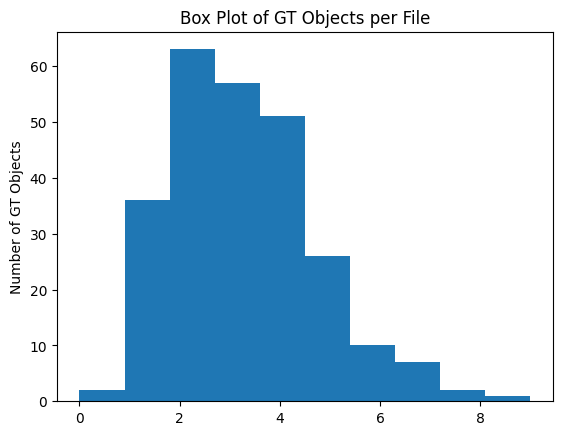

In [5]:
compute_errors_and_log("C:\\Users\\gbo10\\OneDrive\\pictures\\labeling\\65\\labels", "C:\\Users\\gbo10\\OneDrive\\pictures\labeling\\65\\content\\runs\\segment\\predict\\labels")
